In [7]:
#Bibliotecas importadas

import numpy as np
import matplotlib.pylab as plt

In [8]:
#Base do código Runge-Kutta de ordem 4:

def rk4vec( t0, m, u0, dt, f ):
    
    f0 = f ( t0, m, u0 )
    t1 = t0 + dt / 2.0
    u1 = np.zeros ( m )
    u1[0:m] = u0[0:m] + dt * f0[0:m] / 2.0
    f1 = f ( t1, m, u1 )
    
    t2 = t0 + dt / 2.0
    u2 = np.zeros ( m )
    u2[0:m] = u0[0:m] + dt * f1[0:m] / 2.0
    f2 = f ( t2, m, u2 )
    
    t3 = t0 + dt
    u3 = np.zeros ( m )
    u3[0:m] = u0[0:m] + dt * f2[0:m]
    f3 = f ( t3, m, u3 )
    
    u = np.zeros ( m )
    u[0:m] = u0[0:m] + ( dt / 6.0 ) * ( \
                                       f0[0:m] \
                                       + 2.0 * f1[0:m] \
                                       + 2.0 * f2[0:m] \
                                       +       f3[0:m] )
    return u

In [32]:
### Velocidade inicial --> v0 = [Vx,Vy,Vz]:
v0 = [0,7000,0]

### Posição inicial --> r0 = [Rx,Ry,Rz]:
r0 = [10000000,1,1]


def particula():
    m = 6   # numero de equações de derivadas (vx,vy,vz,ax,ay,az)
    
    n = 10000 ### número de passos temporais
    tmin = 0
    tmax = 14693*1 ### tempo máximo de simulação
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    
    # cria arrays que recebem os dados de posição e velocidade
    x  = np.zeros([n])
    vx = np.zeros([n])
    y  = np.zeros([n])
    vy = np.zeros([n])
    z  = np.zeros([n])
    vz = np.zeros([n])
    
    # cria arrays para os dados das derivadas
    u0 = np.zeros([m])
    
    u1 = np.zeros_like(u0)
    
    # condicoes iniciais
    u0[0] = r0[0] #x0
    u0[1] = v0[0] #v0x
    u0[2] = r0[1] #y0
    u0[3] = v0[1] #v0y
    u0[4] = r0[2] #z0
    u0[5] = v0[2] #v0z

    # tempo inicial
    t0 = t[0]
    
    for i in range(n):
        
        # colocamos os valores iniciais nos arrays das variaveis
        
        x[i]  = u0[0]
        vx[i] = u0[1]
        y[i]  = u0[2]
        vy[i] = u0[3]
        z[i]  = u0[4]
        vz[i] = u0[5]
        
        # chamamos a rotina rk4vec
        u1 = rk4vec( t[i], m, u0, dt, part_f)
        
        u0 = np.copy(u1)
        
    return x,vx,y,vy,z,vz,t

In [33]:
# Funcao que tem as equacoes diferenciais
def part_f(t,m,u):
    uprime = np.zeros_like(u)
    
    #LEGENDA:
    
    #u[0] = x
    #u[1] = vx
    #u[2] = y
    #u[3] = vx
    #u[4] = z
    #u[5] = vz
    #uprime[0] = derivada da posição em x (velocidade vx)
    #uprime[1] = derivada da velocidade em x (aceleração ax)
    #uprime[2] = derivada da posição em y (velocidade vy)
    #uprime[3] = derivada da velocidade em y (aceleração ay)
    #uprime[4] = derivada da posição em z (velocidade vz)
    #uprime[5] = derivada da velocidade em z (aceleração az)
    
    
    #Dados para definição da Força Gravitacional (F)
    
    #Massa da Terra:
    #M = 5.97e24
    
    #Massa do Satélite:
    #m = 4.5e8
    
    #Constante gravitacional universal:
    #G = 6.67e-11
    
    #Parâmetro gravitacional padrão
    #µ = 398600e9
    
    #Força gravitacional:
    #F = -(µ * m) / (r**2)
    
    #Aceleração gravitacional:
    #a = F/m
    
    #Angulo entre o vetor da força e o eixo adjascente ao ângulo:
    #angulo = np.arctan(abs(u[2]/u[0]))      # angulo = arctan(|y/x|)
    
    #Aceleração em x:
    #ax = a*np.cos(angulo)
    
    #Aceleração em y:
    #ay = a*np.sin(angulo)
    
    #Aceleração em z:
    #az = 0
    
    # Coeficientes Harmonicos esféricos zonais:
    
    j2 = 1082.64e-6

    j3 = -2.5e-6

    j4 = -1.6e-6

    j5 = -0.15e-6

    j6 = 0.57e-6

    j7 = -0.44e-6
    
    #Parâmetro gravitacional padrão
    µ = 398600e9

    #Raio equatorial da Terra (m)
    r_e = 6378139
    
    #Distancia entre o satélite e a Terra
    r = np.sqrt(u[0]**2 + u[2]**2)          #r^2 = x^2 + y^2

    x = u[0]

    y = u[2]

    z = u[4]
    
    #Aplicação das acelerções devido ao pontencial com os termos do harmônico esférico zonal:
    
    
    a_x1 = -µ * x / (r ** 3)
         
    a_xj2 = 1 - j2 * (3 / 2) * ((r_e / r) ** 2) * ((5 * (z / r)**2) - 1)
         
    a_xj3 = j3 * (5 / 2) * ((r_e / r) ** 3) * (3 * (z / r) - 7 * ((z / r) ** 3))
         
    a_xj4 = j4 * (5 / 8) * ((r_e / r) ** 4) * (3 - 42 * ((z / r) ** 2) + 63 * ((z / r) ** 4))

    a_xj5 = j5 * (3 / 8) * ((r_e / r) ** 5) * (35 * (z / r) - 210 * ((z / r) ** 3) + 231 * ((z / r) ** 5))
         
    a_xj6 = j6 * (1 / 16) * ((r_e / r) ** 6) * (35 - 945 * ((z / r) ** 2) + 3465 * ((z / r) ** 4) - 3003 * ((z / r) ** 6))
    
    
    
    a_z1 = -µ * z / (r ** 3)

    a_zj2 = 1 + j2 * (3 / 2) * ((r_e / r) ** 3) * ((3 - 5 * (z / r)**2))

    a_zj3 = j3 * (3 / 2) * ((r_e / r) ** 2) * (10 * (z / r) - (35 / 3) * ((z / r) ** 3) - (r / z))

    a_zj4 = j4 * (5 / 8) * ((r_e / r) ** 4) * (15 - 70 * ((z / r) ** 2) + 63 * ((z / r) ** 4))

    a_zj5 = j5 * (1 / 8) * ((r_e / r) ** 5) * (315 * (z / r) - 945 * ((z / r) ** 3) + 693 * ((z / r) ** 5) - 15 * (r / z))

    a_zj6 = j6 * (1 / 16) * ((r_e / r) ** 6) * (315 - 2205 * ((z / r) ** 2) + 4851 * ((z / r) ** 4) - 3003 * ((z / r) ** 6))
    
    ##
    
    a_x = a_x1 * (a_xj2 + a_xj3 - a_xj4 - a_xj5 + a_xj6)
    
    a_y = (y / x) * a_x
    
    a_z = a_z1 * (a_zj2 + a_zj3 - a_zj4 - a_zj5 + a_zj6)
    
    #
    #
    #
    #
    #

    
    uprime[0] = u[1]    #Derivada de x = vx
    
    uprime[2] = u[3]    #Derivada de y = vy
    
    uprime[4] = u[5]    #Derivada de z = vz

    
    uprime[1] = a_x     #Derivada de vx = -ax    
                        
    uprime[3] = a_y     #Derivada de vy = -ay    
                         
    uprime[5] = a_z     #Derivada de vz = -az   
        

    
    return uprime

In [34]:
x,vx,y,vy,z,vz,t = particula()

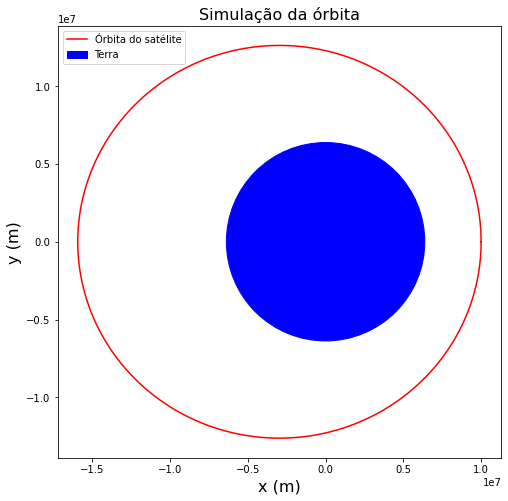

In [35]:
#Gráfico:

fig = plt.figure()

#Tamanho do gráfico
ax = fig.add_axes([0,0,1.5,1.5])
ax.set_aspect('equal')

#Plotagem da posição y em função de x:
ax.plot(x, y, color='r', label = "Órbita do satélite")

#Definir limites do gráfico (opcional)
#plt.xlim(-1e7,1e7)
#plt.ylim(-1e7,1e7)

#Desenho da Terra (considerando raio aproximado de 6400 km)
Terra = plt.Circle((0,0), 6378000, color='b', label = "Terra")
ax.add_patch(Terra)

#Local da legenda
ax.legend(loc=2)

#Títulos dos eixos e principal
ax.set_xlabel('x (m)',fontsize=16)
ax.set_ylabel('y (m)',fontsize=16)
ax.set_title("Simulação da órbita",fontsize=16);

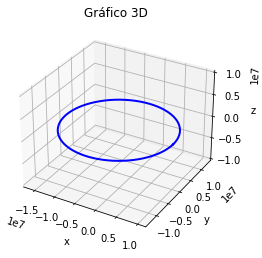

In [37]:
#%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure()

ax = fig.add_subplot(111, projection = "3d")
#ax.set_aspect('equal')
ax.set_zlim(-1e7,1e7)

ax.plot(x, y, z, lw=2, c="b")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Gráfico 3D');

plt.show()

In [41]:
vy[4999]

-4393.644425259557

In [38]:
print(max(x))
print(min(x))

10000008.633488178
-15932100.043678593


In [39]:
print(max(y))
print(min(y))

12619807.886567932
-12627969.05890704


In [40]:
print(max(z))
print(min(z))

2.7928453836351426
-33.884150889586444
